In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Lecture 07

## Implementation of Neural Network in TensorFlow
- One hidden layer
- Tanh Activation
- Moons dataset

<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## 1. Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import tensorflow as tf 

%matplotlib inline

2023-11-23 17:21:30.454542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 17:21:30.454576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 17:21:30.455706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 17:21:30.461531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 17:21:31.054801: W tensorflow/compiler/tf2

In [3]:
gpus = tf.config.list_physical_devices('GPU')

try:
    for g in gpus:
        tf.config.experimental.set_memory_growth(g, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print (len(gpus), 'Phusical GPUs', len(logical_gpus), 'Logical GPUs')
except:
    print ('invalid device')

1 Phusical GPUs 1 Logical GPUs


2023-11-23 17:21:31.655977: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 17:21:31.686934: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-23 17:21:31.687173: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## 2. Setup Global Parameters

In [4]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 1001  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:black;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [5]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

## 4. Visualization
<p style="font-family: Arial; font-size:1.2em;color:black;">
DataFrames are easier to visualize
</p>

In [6]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [9]:
data_df['target'].unique()

array([0, 1])

### 4.1 Different ways of plotting data

<Axes: xlabel='A', ylabel='B'>

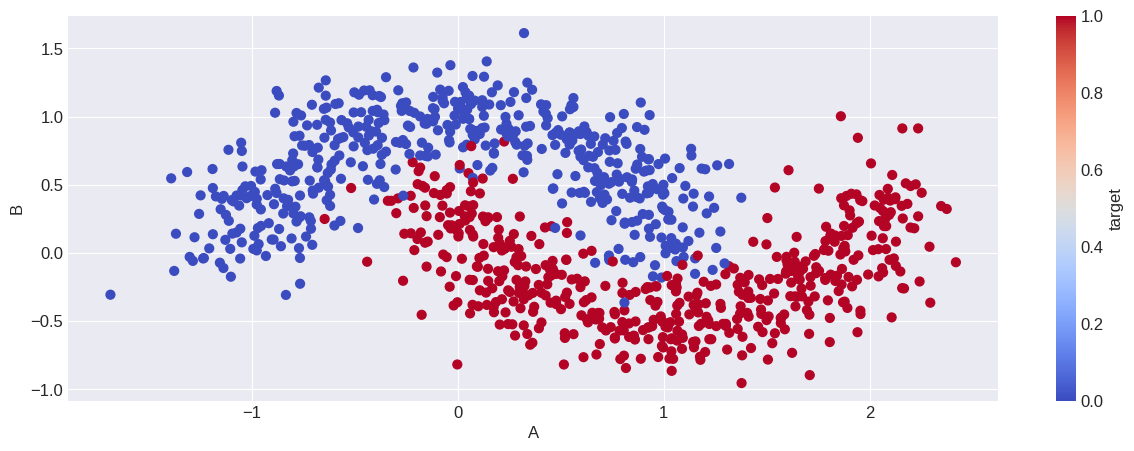

In [10]:
data_df.plot.scatter('A', 'B', s=40, c = 'target', cmap = CMAP)

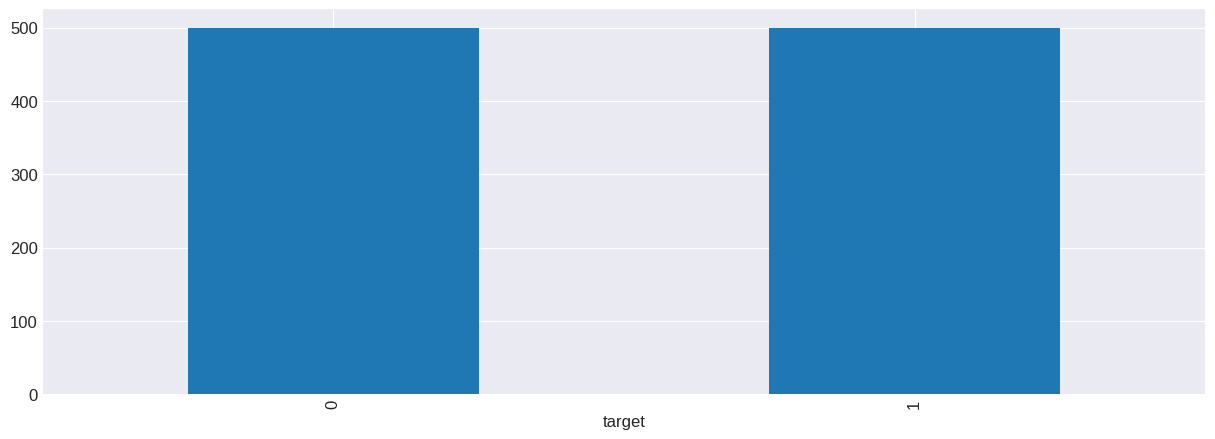

In [11]:
data_df['target'].value_counts().plot(kind = 'bar');

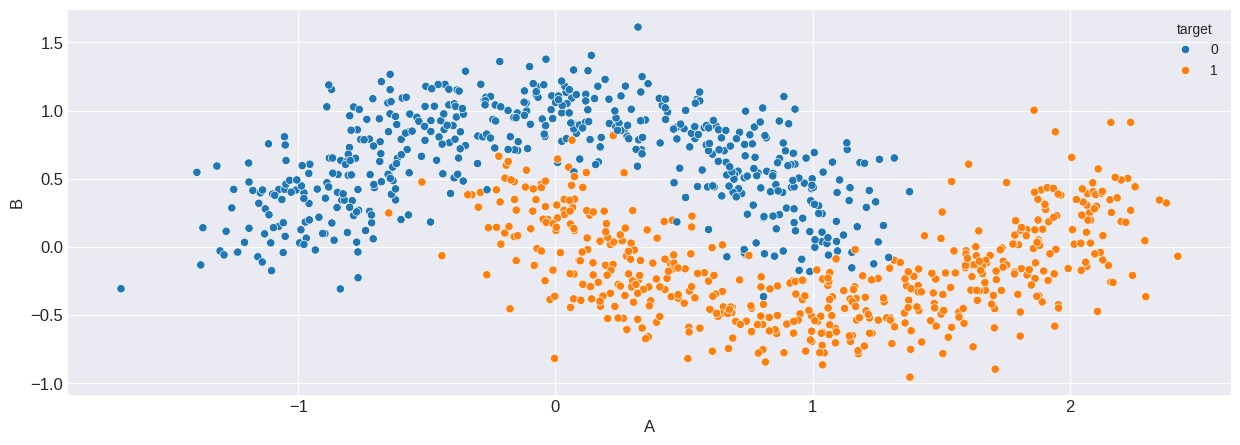

In [12]:
sns.scatterplot(x ='A', y='B', data = data_df, hue = 'target');

<div style="font-family: Arial; font-size:1.2em;">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training. Note that the data is already random.
</div>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [14]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(4, activation='tanh'),
    
    tf.keras.layers.Dense(2)

])

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy ( from_logits = True )

In [16]:
model.compile(optimizer='rmsprop', 
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
#model.fit?

In [18]:
history = model.fit(X_train, y_train,
                    validation_data=[X_test, y_test],
                    epochs=EPOCHS,
                    verbose=2)

Epoch 1/201


2023-11-23 17:21:32.690316: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1cf785acf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-23 17:21:32.690348: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-23 17:21:32.695356: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-23 17:21:32.706490: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2023-11-23 17:21:32.718510: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
I0000 00:00:1700740292.740302   18750 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 - 1s - loss: 1.0231 - accuracy: 0.3450 - val_loss: 1.0178 - val_accuracy: 0.3150 - 663ms/epoch - 27ms/step
Epoch 2/201
25/25 - 0s - loss: 0.9472 - accuracy: 0.3700 - val_loss: 0.9473 - val_accuracy: 0.3250 - 45ms/epoch - 2ms/step
Epoch 3/201
25/25 - 0s - loss: 0.8861 - accuracy: 0.4062 - val_loss: 0.8878 - val_accuracy: 0.3350 - 41ms/epoch - 2ms/step
Epoch 4/201
25/25 - 0s - loss: 0.8345 - accuracy: 0.4400 - val_loss: 0.8372 - val_accuracy: 0.3800 - 43ms/epoch - 2ms/step
Epoch 5/201
25/25 - 0s - loss: 0.7886 - accuracy: 0.4837 - val_loss: 0.7906 - val_accuracy: 0.4550 - 43ms/epoch - 2ms/step
Epoch 6/201
25/25 - 0s - loss: 0.7480 - accuracy: 0.5350 - val_loss: 0.7510 - val_accuracy: 0.5400 - 42ms/epoch - 2ms/step
Epoch 7/201
25/25 - 0s - loss: 0.7128 - accuracy: 0.5950 - val_loss: 0.7154 - val_accuracy: 0.6000 - 55ms/epoch - 2ms/step
Epoch 8/201
25/25 - 0s - loss: 0.6801 - accuracy: 0.6500 - val_loss: 0.6817 - val_accuracy: 0.6450 - 42ms/epoch - 2ms/step
Epoch 9/201
25/25 - 0s - l

In [19]:
res_df = pd.DataFrame(history.history)

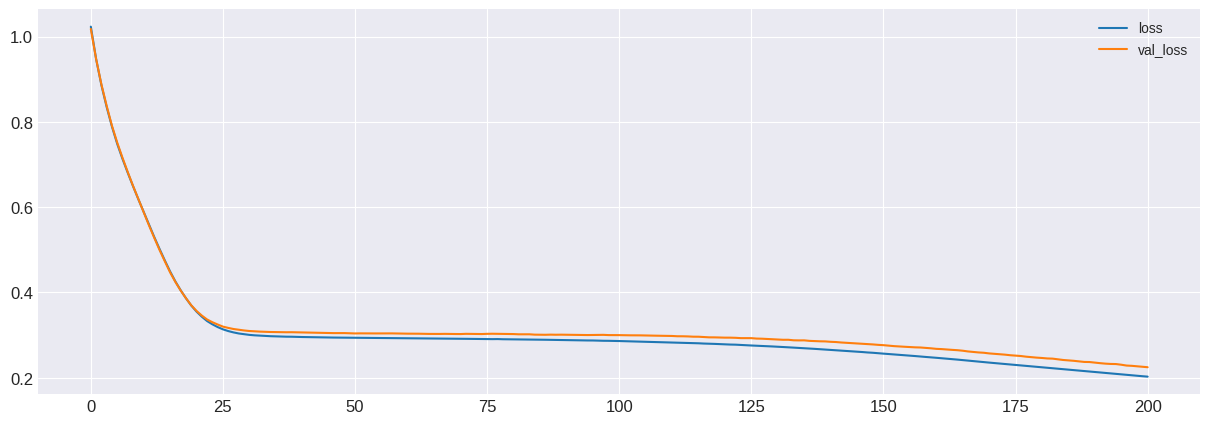

In [20]:
res_df.plot(y = ['loss', 'val_loss']);

In [21]:
res_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.023128,0.34500,1.017820,0.315
1,0.947245,0.37000,0.947277,0.325
2,0.886052,0.40625,0.887800,0.335
3,0.834514,0.44000,0.837167,0.380
4,0.788624,0.48375,0.790637,0.455


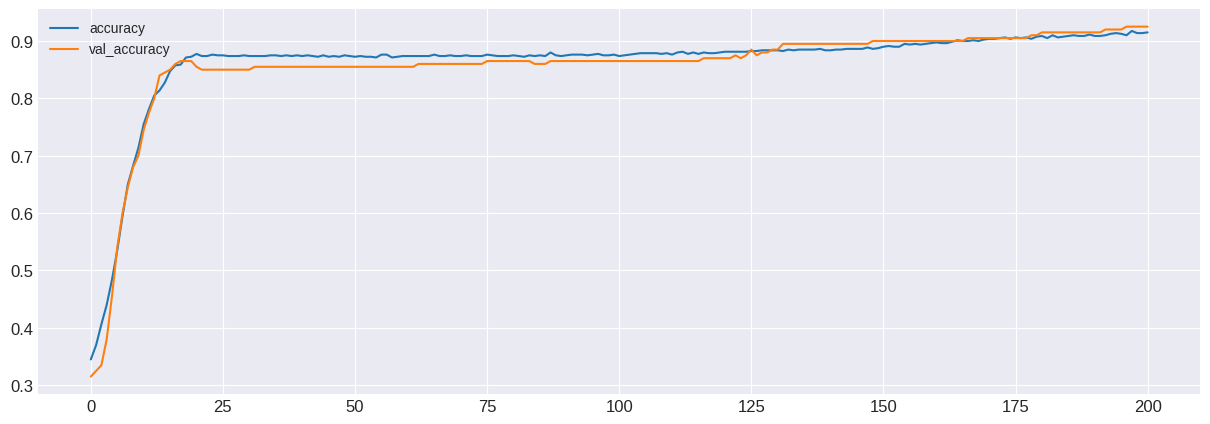

In [22]:
res_df.plot(y = ['accuracy', 'val_accuracy']);

In [23]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.9162


[0.20153497159481049, 0.9162499904632568]

In [24]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9250


[0.22454890608787537, 0.925000011920929]

In [25]:
y_pred = model.predict(X_train)

25/25 [==============================] - 0s 585us/step


In [26]:
accuracy_score (np.argmax(y_pred, axis = 1), y_train)

0.91625

In [27]:
y_pred = model.predict(X_test)
accuracy_score (np.argmax(y_pred, axis = 1), y_test)

7/7 [==============================] - 0s 821us/step


0.925

In [30]:
###-----------------------------------
### Function to plot Decision boundary
###-----------------------------------

def fn_plot_decision_boundary(model, X_tr, y_tr, X_ts, y_ts):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X_tr : train feature matrix
           y_tr : train labels
           X_ts : test feature matrix
           y_ts : test labels
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis = 1)
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )

3377/3377 [==============================] - 2s 576us/step


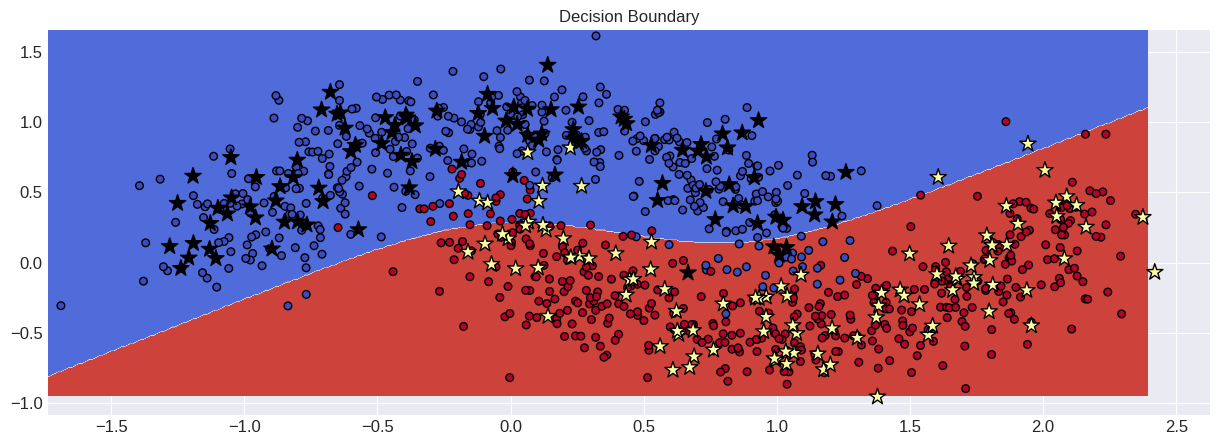

In [31]:
fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary");